<H1> Intro to Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
“relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing
practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and
flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this
goal.
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the
[Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).


<H3>0. Setup 

Import the libraries.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You're ready to use Pandas!

<H3> 1. Basics: "Series" and "DataFrame"

(Find more in the Data Structure Intro section)

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast
majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users,
DataFrame provides everything that R’s data.frame provides and much more. Pandas is built on top of NumPy and is
intended to integrate well within a scientific computing environment with many other 3rd party libraries.

<H2> Series </H2>
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers,
Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is
to call:


s = Series(data, index=index)

Creating a Series by passing a list of values, letting pandas create a default integer index

In [11]:
s = pd.Series([1,3,5,np.nan,6,8])

In [12]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
s[1]

3.0

In [160]:
s = pd.Series([1,3,5,np.nan,6,8], index = ["id_"+str(i) for i in range(6)])

In [161]:
s

id_0    1.0
id_1    3.0
id_2    5.0
id_3    NaN
id_4    6.0
id_5    8.0
dtype: float64

In [162]:
s["id_4"]

6.0

<H2> DataFrame </H2>
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like
an Excel spreadsheet or SQL table, or a Python dict (dictionary) of Series objects. It is generally the most commonly
used pandas object. Like Series, DataFrame accepts many different kinds of input:

*   Dict of 1D ndarrays, lists, dicts, or Series
*   2-D numpy.ndarray
*   Structured or record ndarray
*   A Series
*   Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass
an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict
of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [18]:
dates = pd.date_range('20220101', periods=6)

In [19]:
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [21]:
df

,A,B,C,D
2022-01-01,-0.180612,0.067442,-0.199881,0.551448
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050
2022-01-04,0.819437,0.260454,-1.179605,0.303240
2022-01-05,0.595260,-0.134783,-1.219406,0.981173
2022-01-06,-0.271590,-0.080111,1.232864,-1.514883


Creating a DataFrame by passing a dictionary of objects that can be converted to series-like.

In [24]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [25]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [26]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<H3>2. Viewing Data

(Find more in the Basics section)

See the top & bottom rows of the frame

In [27]:
df.head()

,A,B,C,D
2022-01-01,-0.180612,0.067442,-0.199881,0.551448
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050
2022-01-04,0.819437,0.260454,-1.179605,0.303240
2022-01-05,0.595260,-0.134783,-1.219406,0.981173


In [28]:
df.tail(3)

,A,B,C,D
2022-01-04,0.819437,0.260454,-1.179605,0.303240
2022-01-05,0.595260,-0.134783,-1.219406,0.981173
2022-01-06,-0.271590,-0.080111,1.232864,-1.514883


Display the index, columns, and the underlying numpy data

In [29]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [30]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [31]:
df.values

array([[-0.18061183,  0.0674424 , -0.19988112,  0.55144796],
       [ 0.48957181,  0.18190739, -0.7688016 , -1.26507244],
       [ 0.57927501, -1.85849207, -1.08965669, -1.32104961],
       [ 0.81943664,  0.26045382, -1.17960465,  0.30324018],
       [ 0.59525959, -0.13478274, -1.2194064 ,  0.98117331],
       [-0.27159037, -0.0801115 ,  1.23286411, -1.51488321]])

Describe shows a quick statistic summary of your data

In [32]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.338557,-0.260597,-0.537414,-0.377524
std,0.451599,0.797068,0.946979,1.108518
min,-0.271590,-1.858492,-1.219406,-1.514883
25%,-0.013066,-0.121115,-1.157118,-1.307055
50%,0.534423,-0.006335,-0.929229,-0.480916
75%,0.591263,0.153291,-0.342111,0.489396
max,0.819437,0.260454,1.232864,0.981173


<H2>3. Selecting data

(Find more in the indexing documentation Indexing and Selecing Data and MultiIndex / Advanced Indexing)

Selecting a single column, which yields a Series, equivalent to df.A

In [29]:
df['A']

2013-01-01    0.890330
2013-01-02   -0.585088
2013-01-03   -0.713641
2013-01-04    0.385744
2013-01-05    0.512667
2013-01-06   -1.734715
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.


In [34]:
df[0:3]

,A,B,C,D
2022-01-01,-0.180612,0.067442,-0.199881,0.551448
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050


In [35]:
df['20220102':'20220104']

,A,B,C,D
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050
2022-01-04,0.819437,0.260454,-1.179605,0.303240


<H2> Selection by label

(Find more in Selection by Label)

For getting a single value

In [36]:
df.loc[dates[0],'A']

-0.1806118316001302

For getting a cross section using a label

In [37]:
df.loc[dates[0]]

A   -0.180612
B    0.067442
C   -0.199881
D    0.551448
Name: 2022-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [38]:
df.loc[:,['A','B']]

,A,B
2022-01-01,-0.180612,0.067442
2022-01-02,0.489572,0.181907
2022-01-03,0.579275,-1.858492
2022-01-04,0.819437,0.260454
2022-01-05,0.595260,-0.134783
2022-01-06,-0.271590,-0.080111


Showing label slicing, both endpoints are included

In [39]:
df.loc['20220102':'20220104',['A','B']]

,A,B
2022-01-02,0.489572,0.181907
2022-01-03,0.579275,-1.858492
2022-01-04,0.819437,0.260454


<H2> Selection by Position

For getting a single value

In [40]:
df.iloc[1,1]

0.181907385945508

By integer slices, acting similar to numpy/python

In [41]:
df.iloc[3:5,0:2]

,A,B
2022-01-04,0.819437,0.260454
2022-01-05,0.595260,-0.134783


For slicing rows explicitly

In [42]:
df.iloc[1:3,:]

,A,B,C,D
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050


For slicing columns explicitly

In [43]:
df.iloc[:,1:3]

,B,C
2022-01-01,0.067442,-0.199881
2022-01-02,0.181907,-0.768802
2022-01-03,-1.858492,-1.089657
2022-01-04,0.260454,-1.179605
2022-01-05,-0.134783,-1.219406
2022-01-06,-0.080111,1.232864


By lists of integer position locations, similar to the numpy/python style

In [44]:
df.iloc[[1,2,4],[0,2]]

,A,C
2022-01-02,0.489572,-0.768802
2022-01-03,0.579275,-1.089657
2022-01-05,0.595260,-1.219406


<h2> Boolean Indexing

Using a single column’s values to select data.

In [45]:
df[df.A > 0]

,A,B,C,D
2022-01-02,0.489572,0.181907,-0.768802,-1.265072
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050
2022-01-04,0.819437,0.260454,-1.179605,0.303240
2022-01-05,0.595260,-0.134783,-1.219406,0.981173


A where operation for getting

In [46]:
df[df > 0]

,A,B,C,D
2022-01-01,NaN,0.067442,NaN,0.551448
2022-01-02,0.489572,0.181907,NaN,NaN
2022-01-03,0.579275,NaN,NaN,NaN
2022-01-04,0.819437,0.260454,NaN,0.303240
2022-01-05,0.595260,NaN,NaN,0.981173
2022-01-06,NaN,NaN,1.232864,NaN


Using the isin() method for filtering:

In [47]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2022-01-01,-0.180612,0.067442,-0.199881,0.551448,one
2022-01-02,0.489572,0.181907,-0.768802,-1.265072,one
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050,two
2022-01-04,0.819437,0.260454,-1.179605,0.303240,three
2022-01-05,0.595260,-0.134783,-1.219406,0.981173,four
2022-01-06,-0.271590,-0.080111,1.232864,-1.514883,three


In [48]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2022-01-03,0.579275,-1.858492,-1.089657,-1.321050,two
2022-01-05,0.595260,-0.134783,-1.219406,0.981173,four


<h2> Setting

Setting values by label

In [49]:
df.at[dates[0],'A'] = 0

Setting values by position

In [50]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [51]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [64]:
df

,A,B,C,D
2022-01-01,0.000000,0.000000,-0.199881,5
2022-01-02,0.489572,0.181907,-0.768802,5
2022-01-03,0.579275,-1.858492,-1.089657,5
2022-01-04,0.819437,0.260454,-1.179605,5
2022-01-05,0.595260,-0.134783,-1.219406,5
2022-01-06,-0.271590,-0.080111,1.232864,5


A where operation with setting.

In [65]:
df2 = df.copy()

In [66]:
df2[df2 > 0] = -df2

In [68]:
df2

,A,B,C,D
2022-01-01,0.000000,0.000000,-0.199881,-5
2022-01-02,-0.489572,-0.181907,-0.768802,-5
2022-01-03,-0.579275,-1.858492,-1.089657,-5
2022-01-04,-0.819437,-0.260454,-1.179605,-5
2022-01-05,-0.595260,-0.134783,-1.219406,-5
2022-01-06,-0.271590,-0.080111,-1.232864,-5


<h2> Operations

<h3> Statistics

<i>Operations in general exclude missing data (i.e. "nan" values).<i>

Performing a descriptive statistic

In [69]:
df.mean()

A    0.368659
B   -0.271838
C   -0.537414
D    5.000000
dtype: float64

Same operation on the other axis

In [70]:
df.mean(1)

2022-01-01    1.200030
2022-01-02    1.225669
2022-01-03    0.657782
2022-01-04    1.225071
2022-01-05    1.060268
2022-01-06    1.470291
Freq: D, dtype: float64

In [72]:
df.std(1)

2022-01-01    2.535065
2022-01-02    2.572597
2022-01-03    3.068452
2022-01-04    2.653776
2022-01-05    2.730249
2022-01-06    2.446298
Freq: D, dtype: float64

<h3>Apply

Applying functions to the data

In [73]:
df.apply(np.cumsum)

,A,B,C,D
2022-01-01,0.000000,0.000000,-0.199881,5
2022-01-02,0.489572,0.181907,-0.968683,10
2022-01-03,1.068847,-1.676585,-2.058339,15
2022-01-04,1.888283,-1.416131,-3.237944,20
2022-01-05,2.483543,-1.550914,-4.457350,25
2022-01-06,2.211953,-1.631025,-3.224486,30


In [74]:
df.apply(lambda x: x.max() - x.min())

A    1.091027
B    2.118946
C    2.452271
D    0.000000
dtype: float64

<h3>Histogramming

In [164]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [165]:
s

0    6
1    6
2    4
3    4
4    5
5    0
6    2
7    6
8    1
9    6
dtype: int64

In [166]:
s.value_counts()

6    4
4    2
5    1
2    1
1    1
0    1
dtype: int64

<h2> Plotting

In [79]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [80]:
ts = ts.cumsum()

In [81]:
ts

2000-01-01    -1.668163
2000-01-02    -2.191096
2000-01-03    -3.906946
2000-01-04    -4.486824
2000-01-05    -6.612080
                ...    
2002-09-22    22.869826
2002-09-23    23.454393
2002-09-24    23.858902
2002-09-25    24.171915
2002-09-26    23.535458
Freq: D, Length: 1000, dtype: float64

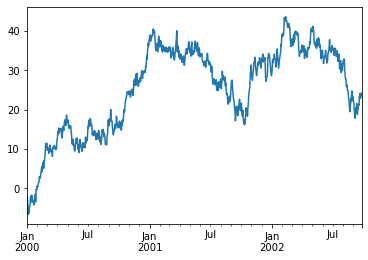

In [82]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

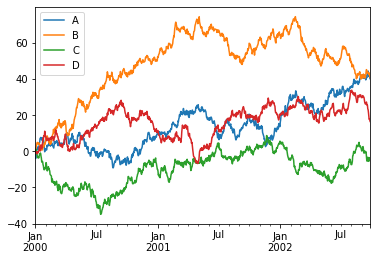

In [87]:
plt.figure() 
df.plot() 
plt.legend(loc='best')

 <h2>6. Getting Data In/Out

<h3>CSV

*writing to  a csv file by df.to_csv(filename)*

In [13]:
people_df = pd.read_csv("Project_Class/files1/weight_height_gender.csv")

In [14]:
people_df

,Weight,Height,Gender
0,90,180,Male
1,56,161,Female
2,72,186,Male
3,49,160,Female
4,78,184,Male
...,...,...,...
78,74,177,Female
79,46,155,Female
80,46,155,Female
81,56,167,Female


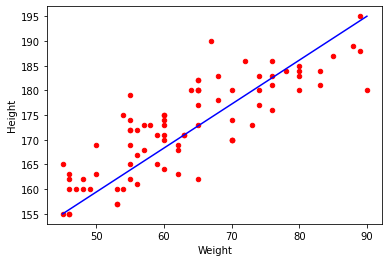

In [19]:
people_df.plot(kind = "scatter", x = "Weight", y = "Height", color = "red")
X_ln = np.array([people_df.Weight.min(),people_df.Weight.max()])
Y_ln = np.array([people_df.Height.min(),people_df.Height.max()])
plt.plot(X_ln, Y_ln, 'b-')

In [17]:
X_ln

array([45, 45])

<h2>1. Grouping and aggregating

By “group by” we are referring to a process involving one or more of the following steps:
 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to e.g. compute a summary statistic (or statistics) about each group, such as group sums, means or counts.

Since the set of object instance method on pandas data structures are generally rich and expressive, we often simplywant to invoke, say, a DataFrame function on each group.

See the cookbook for some advanced strategies

<h3>Splitting an object into groups:

Pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labelsto group names. To create a GroupBy object (more on what the GroupBy object is later), you do the following:

 - grouped = obj.groupby(key) <br>
 - grouped = obj.groupby(key, axis=1) <br>
 - grouped = obj.groupby([key1, key2]) <br>

The mapping can be specified many different ways, but for DataFrame objects you can use a string indicating acolumn to be used to group, for example: df.groupby('A'). This is just syntactic sugar for df.groupby(df['A']),but it makes life simpler

Collectively we refer to the grouping objects as the keys. For example, consider the following DataFrame:

In [168]:
from numpy.random import randn
df=pd.DataFrame({'A':['foo','bar','foo','bar', 'foo', 'bar','foo','foo'], 'B':['one','one','two', 'three', 'two','two','one','three'], 'C':randn(8),'D':randn(8)})

In [169]:
df

,A,B,C,D
0,foo,one,-0.477109,0.116676
1,bar,one,-0.621572,-0.661617
2,foo,two,-0.325150,-1.605153
3,bar,three,-0.775265,0.696430
4,foo,two,-0.269058,-1.295812
5,bar,two,-0.552169,0.524251
6,foo,one,0.202609,2.204817
7,foo,three,0.292919,0.042552


In [99]:
grouped=df.groupby('A')

In [101]:
for name, group in grouped:
    print(name, group)

bar      A      B         C         D
1  bar    one -1.082822 -0.000215
3  bar  three -0.546066  0.555632
5  bar    two  0.228987  0.334580
foo      A      B         C         D
0  foo    one -1.619137 -2.746519
2  foo    two  1.843902 -1.116060
4  foo    two -0.041678 -0.742646
6  foo    one -0.803585 -0.319071
7  foo  three  0.063057  1.188441


In [102]:
grouped=df.groupby(['A','B'])

In [103]:
for name, group in grouped:
    print(name, group)

('bar', 'one')      A    B         C         D
1  bar  one -1.082822 -0.000215
('bar', 'three')      A      B         C         D
3  bar  three -0.546066  0.555632
('bar', 'two')      A    B         C        D
5  bar  two  0.228987  0.33458
('foo', 'one')      A    B         C         D
0  foo  one -1.619137 -2.746519
6  foo  one -0.803585 -0.319071
('foo', 'three')      A      B         C         D
7  foo  three  0.063057  1.188441
('foo', 'two')      A    B         C         D
2  foo  two  1.843902 -1.116060
4  foo  two -0.041678 -0.742646


These will split the DataFrame on its index (rows). We could also split by the columns by using a function (try it!):

In [104]:
def get_letter_type(letter):
    if letter.lower()in'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [105]:
grouped=df.groupby(get_letter_type,axis=1)

In [106]:
for name, group in grouped:
    print(name, group)

consonant        B         C         D
0    one -1.619137 -2.746519
1    one -1.082822 -0.000215
2    two  1.843902 -1.116060
3  three -0.546066  0.555632
4    two -0.041678 -0.742646
5    two  0.228987  0.334580
6    one -0.803585 -0.319071
7  three  0.063057  1.188441
vowel      A
0  foo
1  bar
2  foo
3  bar
4  foo
5  bar
6  foo
7  foo


Starting with 0.8, pandas Index objects now supports duplicate values. If a non-unique index is used as the group keyin a groupby operation, all values for the same index value will be considered to be in one group and thus the output of aggregation functions will only contain unique index values:

In [107]:
lst=[1,2,3,1,2,3]

In [108]:
s=pd.Series([1,2,3,10,20,30],lst)

In [109]:
grouped=s.groupby(level=0)

In [112]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [113]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [114]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

Note that no splitting occurs until it’s needed. Creating the GroupBy object only verifies that you’ve passed a valid mapping.

Note: Many kinds of complicated data manipulations can be expressed in terms of GroupBy operations (though can’t be guaranteed to be the most efficient). You can get quite creative with the label mapping functions.

<h3>Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the groupeddata.

An obvious one is aggregation via the 'aggregate' or equivalently 'agg' method:

In [115]:
grouped=df.groupby('A')

In [116]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,-1.399902,0.889998
foo,-0.557441,-3.735855


In [117]:
 grouped = df.groupby(['A', 'B'])

In [118]:
 grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -1.082822 -0.000215
    three -0.546066  0.555632
    two    0.228987  0.334580
foo one   -2.422722 -3.065590
    three  0.063057  1.188441
    two    1.802224 -1.858706

As you can see, <mark style=background-color:yellow>the result of</mark> the aggregation will have the group names as the new index along the grouped axis. In the case of multiple keys, the result is a MultiIndex by default, though this can be changed by using the `as_index` option:

In [124]:
grouped = df.groupby(['A', 'B'], as_index=False)

In [125]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-1.082822,-0.000215
1,bar,three,-0.546066,0.555632
2,bar,two,0.228987,0.334580
3,foo,one,-2.422722,-3.065590
4,foo,three,0.063057,1.188441
5,foo,two,1.802224,-1.858706


Another simple aggregation example is to compute the size of each group. This is included in GroupBy as the `size`
method. It returns a Series whose index are the group names and whose values are the sizes of each group.

In [126]:
 grouped.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [127]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -1.082822       NaN -1.082822 -1.082822 -1.082822 -1.082822 -1.082822   
1   1.0 -0.546066       NaN -0.546066 -0.546066 -0.546066 -0.546066 -0.546066   
2   1.0  0.228987       NaN  0.228987  0.228987  0.228987  0.228987  0.228987   
3   2.0 -1.211361  0.576683 -1.619137 -1.415249 -1.211361 -1.007473 -0.803585   
4   1.0  0.063057       NaN  0.063057  0.063057  0.063057  0.063057  0.063057   
5   2.0  0.901112  1.333306 -0.041678  0.429717  0.901112  1.372507  1.843902   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -0.000215       NaN -0.000215 -0.000215 -0.000215 -0.000215 -0.000215  
1   1.0  0.555632       NaN  0.555632  0.555632  0.555632  0.555632  0.555632  
2   1.0  0.334580       NaN  0.334580  0.334580  0.334580  0.334580  0.334580  
3   2.0 -1.532795  1.716465 -2.746519 -2.139657 -1.532795 -0.925933 -0.319071  
4   1.0  1.188441       NaN  1.188441  1.188441  1.188441  1.188441  1.188441  
5   2.0 -0.929353  0.264043 -1.116060 -1.022706 -0.929353 -0.835999 -0.742646

**Note: Aggregating functions are ones that reduce the dimension of the returned objects, for example:** *mean, sum,
size, count, std, var, sem, describe, first, last, nth, min, max.*    
**This is what happens when you do for example** *DataFrame.sum()* **and get back a** *Series*.

<h2>Exercise

Write a function createFrame() that takes as input three positive integers n, m and k and returns a
pandas DataFrame object with n rows and m columns, containing random integers in the
range 0 to k (both endpoints included). Group the dataframe by values of the first column and compute the sum, average, min, max,
and standard deviation.

In [152]:
import math
def createFrame(m,n, k):
    df = pd.DataFrame(np.random.randint(k, size = (m,n)), columns = ["col_"+str(i) for i in range(n)])
    grouped = df.groupby("col_0")
    return grouped.sum(), grouped.mean(), grouped.min(), grouped.max(), grouped.std()

In [154]:
createFrame(100, 3, 3)

(       col_1  col_2
 col_0              
 0         32     31
 1         32     35
 2         29     38,
           col_1     col_2
 col_0                    
 0      1.066667  1.033333
 1      0.914286  1.000000
 2      0.828571  1.085714,
        col_1  col_2
 col_0              
 0          0      0
 1          0      0
 2          0      0,
        col_1  col_2
 col_0              
 0          2      2
 1          2      2
 2          2      2,
           col_1     col_2
 col_0                    
 0      0.868345  0.808717
 1      0.817868  0.840168
 2      0.821967  0.919444)

<H2>2. Working with missing data

In this section, we will discuss missing (also referred to as NA) values in pandas.
See the <font color = blue>cookbook</font> for some advanced strategies

<H3>Missing data basics

<H4>When / why does data become missing?

Some might quibble over our usage of missing. By “missing” we simply mean **null** or “not present for whatever reason”.
Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. 
For example, in a collection of financial time series, some of the time series might start on different dates.
Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is **introduced** into a data set is by reindexing. For
example

In [102]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])

In [103]:
df['four'] = 'bar'

In [104]:
df['five'] = df['one'] > 0

In [105]:
df

,one,two,three,four,five
a,-0.706897,-0.631542,1.289141,bar,False
c,0.161016,-0.703575,0.657035,bar,True
e,-0.930488,-0.683948,-1.089541,bar,False
f,1.767862,0.282852,-0.103379,bar,True
h,0.296957,-2.403669,0.549190,bar,True


In [106]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [107]:
df2

,one,two,three,four,five
a,-0.706897,-0.631542,1.289141,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,0.161016,-0.703575,0.657035,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.930488,-0.683948,-1.089541,bar,False
f,1.767862,0.282852,-0.103379,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.296957,-2.403669,0.549190,bar,True


<H4>Values considered “missing”

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While `NaN`
is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily
detect this value with data of different types: floating point, integer, boolean, and general object. In many cases,
however, the Python `None` will arise and we wish to also consider that “missing” or “null”.

To make detecting missing values easier (and across different array dtypes), pandas provides the `isnull()` and
`notnull()` functions, which are also methods on `Series` objects:

In [108]:
df2['one']

a   -0.706897
b         NaN
c    0.161016
d         NaN
e   -0.930488
f    1.767862
g         NaN
h    0.296957
Name: one, dtype: float64

In [109]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [110]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

**Summary**: `NaN` and `None` (in object arrays) are considered missing by the `isnull` and `notnull` functions. `inf` and `-inf` are no longer considered missing by default.


<H3>Inserting missing data

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based
on the dtype.

For example, numeric containers will always use `NaN` regardless of the missing value type chosen:

In [111]:
s = pd.Series([1, 2, 3])

In [112]:
s.loc[0] = None

In [113]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

Likewise, datetime containers will always use `NaT`.

For object containers, pandas will use the value given:

In [114]:
s = pd.Series(["a", "b", "c"])

In [115]:
s.loc[0] = None

In [116]:
s.loc[1] = np.nan

In [117]:
s

0    None
1     NaN
2       c
dtype: object


<H3>Calculations with missing data

Missing values propagate naturally through arithmetic operations between pandas objects.

In [118]:
a = pd.DataFrame(np.random.randn(5, 2), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two'])
a.loc['a','one'] = np.nan
a.loc['c','one'] = np.nan
a

,one,two
a,NaN,-0.895770
c,NaN,1.066112
e,-0.193772,-1.147819
f,-2.299183,0.160662
h,-0.484579,1.723858


In [119]:
b = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two','three'])
b.loc['a','one'] = np.nan
b.loc['c','one'] = np.nan
b.loc['h','one'] = np.nan
b

,one,two,three
a,NaN,0.344105,0.980132
c,NaN,0.672315,-0.333434
e,-1.197563,-0.642437,0.769472
f,0.535169,-0.375934,-0.695042
h,NaN,2.218355,0.300500


In [120]:
a + b

,one,three,two
a,NaN,NaN,-0.551666
c,NaN,NaN,1.738427
e,-1.391335,NaN,-1.790256
f,-1.764014,NaN,-0.215272
h,NaN,NaN,3.942213



The descriptive statistics and computational methods are all written to account for missing data. For example:
+ When summing data, NA (missing) values will be treated as zero
+ If the data are all NA, the result will be NA
+ Methods like **cumsum** and **cumprod** ignore NA values, but preserve them in the resulting arrays

In [121]:
df = b
df

,one,two,three
a,NaN,0.344105,0.980132
c,NaN,0.672315,-0.333434
e,-1.197563,-0.642437,0.769472
f,0.535169,-0.375934,-0.695042
h,NaN,2.218355,0.300500


In [122]:
df['one'].sum()

-0.6623930791231137

In [123]:
df.mean(1)

a    0.662119
c    0.169441
e   -0.356843
f   -0.178602
h    1.259428
dtype: float64

In [124]:
df.cumsum()

,one,two,three
a,NaN,0.344105,0.980132
c,NaN,1.016420,0.646698
e,-1.197563,0.373983,1.416170
f,-0.662393,-0.001951,0.721128
h,NaN,2.216404,1.021628



<H4>NA values in GroupBy

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example.


<H3>Cleaning / filling missing dat

pandas objects are equipped with various data manipulation methods for dealing with missing data.

<H4>Filling missing values: fillna

The **fillna** function can “fill in” NA values with non-null data in a couple of ways, which we illustrate:

**Replace NAwith a scalar value**

In [125]:
df2 = df
df2['four'] = 'bar'
df2['five'] = b['two'] > 0
df2['six'] = pd.datetime.now().date()
df2

<ipython-input-125-93cdd9412b7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df2['six'] = pd.datetime.now().date()


,one,two,three,four,five,six
a,NaN,0.344105,0.980132,bar,True,2022-02-05
c,NaN,0.672315,-0.333434,bar,True,2022-02-05
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05
h,NaN,2.218355,0.300500,bar,True,2022-02-05


In [126]:
df2.fillna(0)

,one,two,three,four,five,six
a,0.000000,0.344105,0.980132,bar,True,2022-02-05
c,0.000000,0.672315,-0.333434,bar,True,2022-02-05
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05
h,0.000000,2.218355,0.300500,bar,True,2022-02-05


In [127]:
df2['four'].fillna('missing')

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

<H4>Fill gaps forward or backward

Using the same filling arguments as <font color = blue>*reindexing*</font>, we can propagate non-null values forward or backward:

In [128]:
df

,one,two,three,four,five,six
a,NaN,0.344105,0.980132,bar,True,2022-02-05
c,NaN,0.672315,-0.333434,bar,True,2022-02-05
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05
h,NaN,2.218355,0.300500,bar,True,2022-02-05


In [129]:
df.fillna(method='pad')

,one,two,three,four,five,six
a,NaN,0.344105,0.980132,bar,True,2022-02-05
c,NaN,0.672315,-0.333434,bar,True,2022-02-05
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05
h,0.535169,2.218355,0.300500,bar,True,2022-02-05


To remind you, these are the available filling methods:

|  **Method** | **Action**  |
|  :----  | :----:  |
|  pad / ffill  |   Fill values forward |
| bfill / backfill  |    Fill values backward  |

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time
point.

The `ffill()` function is equivalent to `fillna(method='ffill')` and `bfill()` is equivalent to `fillna(method='bfill')`


<H4>Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the **dropna**
method:

In [130]:
df

,one,two,three,four,five,six
a,NaN,0.344105,0.980132,bar,True,2022-02-05
c,NaN,0.672315,-0.333434,bar,True,2022-02-05
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05
h,NaN,2.218355,0.300500,bar,True,2022-02-05


In [131]:
df.dropna(axis=0)

,one,two,three,four,five,six
e,-1.197563,-0.642437,0.769472,bar,False,2022-02-05
f,0.535169,-0.375934,-0.695042,bar,False,2022-02-05


In [132]:
df.dropna(axis=1)

,two,three,four,five,six
a,0.344105,0.980132,bar,True,2022-02-05
c,0.672315,-0.333434,bar,True,2022-02-05
e,-0.642437,0.769472,bar,False,2022-02-05
f,-0.375934,-0.695042,bar,False,2022-02-05
h,2.218355,0.300500,bar,True,2022-02-05


In [133]:
df['one'].dropna()

e   -1.197563
f    0.535169
Name: one, dtype: float64

Series.dropna is a simpler method as it only has one axis to consider. DataFrame.dropna has considerably more
options than Series.dropna, which can be examined in the API.